In [1]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers = pd.read_csv('yelp-data-lab5.csv')

# Print out the first rows of papers
papers.head()

,user_id,prod_id,rating,label,date,review,Year,venue
0,60609,3611,bad,1,7/12/13,horrible. I went there for a nice fresh lobste...,2013,Don Pepe II
1,121342,3528,bad,1,7/7/12,"This might be ok for a beer, but don't dare tr...",2012,Rattle ‘N’ Hum
2,102327,1378,bad,-1,11/17/12,one of the worst place to eat. We have never a...,2012,Green Chilli
3,108938,4037,bad,1,1/28/13,alfies has ok food. The manager is super nice ...,2013,Alfie’s
4,66638,2645,bad,-1,12/3/13,Love love this place! The food is great! The r...,2013,Buon Appetito


In [46]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['review'].head())

# Remove punctuation
papers['review_processed'] = papers['review'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['review_processed'] = papers['review_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers['review_processed'].head())

0    horrible. I went there for a nice fresh lobste...
1    This might be ok for a beer, but don't dare tr...
2    one of the worst place to eat. We have never a...
3    alfies has ok food. The manager is super nice ...
4    Love love this place! The food is great! The r...
Name: review, dtype: object
0    horrible i went there for a nice fresh lobster...
1    this might be ok for a beer but don't dare try...
2    one of the worst place to eat we have never at...
3    alfies has ok food the manager is super nice b...
4    love love this place the food is great the rea...
Name: review_processed, dtype: object


In [47]:

# Join the different processed titles together.
long_string = " ".join(papers.review_processed)


In [49]:
good_review = papers[papers['rating'] == 'good']

In [51]:
bad_review = papers[papers['rating'] == 'bad']

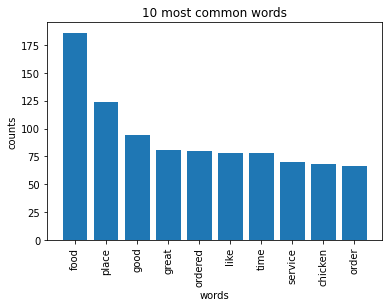

In [4]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['review_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 10 most common words in good reviews

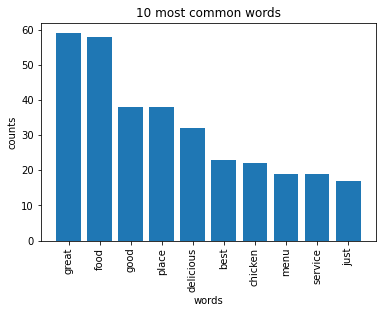

In [55]:
count_data = count_vectorizer.fit_transform(good_review['review_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 10 most common words in bad reviews

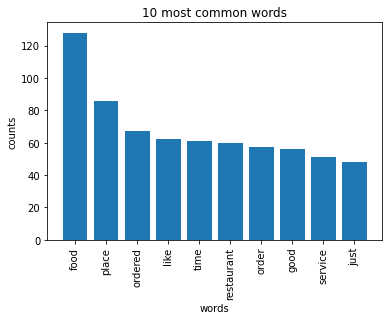

In [53]:
count_data = count_vectorizer.fit_transform(bad_review['review_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## N-Grams


In [5]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams

In [6]:
df = pd.read_csv('yelp-data-lab5.csv')

In [7]:
text = df['review']

In [8]:
# importing regex module
import re
# removing null values to avoid errors 
text.dropna(inplace = True)

In [9]:
# Remove punctuation
df['review_processed'] = df['review'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['review_processed'] = df['review_processed'].map(lambda x: x.lower())

long_string = " ".join(df.review_processed)

In [10]:
df['review_processed'] = df.apply(lambda row: nltk.word_tokenize(row['review']), axis=1)

In [11]:
esNgrams = ngrams(df['review_processed'], 1)

## TF-IDF

In [12]:
y = df['rating']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], y, test_size = 0.3, random_state = 1)

In [14]:
df['rating'].value_counts()

bad     119
good     81
Name: rating, dtype: int64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['00', '10', '100', '10pm', '11', '1138', '12', '13', '14', '15']
[[0.         0.28181892 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [17]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [34]:
tfidf_df.head()

,00,10,100,10pm,11,1138,12,13,14,15,...,yoga,yogurt,yolked,york,yuca,yum,yummmmm,zero,zi,zia
0,0.0,0.281819,0.0,0.0,0.0,0.0,0.173107,0.000000,0.218855,0.147866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.405442,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.070209,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

In [21]:
metrics.confusion_matrix(y_test, pred, labels = ['bad','good'])

array([[28,  0],
       [24,  8]])

In [24]:
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.6


In [27]:
from sklearn.metrics import f1_score
f1score = metrics.f1_score(y_test, pred,pos_label='bad')
print(f1score)

0.7000000000000001


## Important Variables

In [40]:
features = tfidf_vectorizer.get_feature_names()


In [41]:
# https://buhrmann.github.io/tfidf-analysis.html

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [43]:
# https://buhrmann.github.io/tfidf-analysis.html

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [44]:
top_mean_feats(tfidf_train, features, grp_ids=None, min_tfidf=0.1, top_n=25)

,feature,tfidf
0,food,0.028194
1,great,0.024472
2,place,0.022512
3,good,0.019595
4,service,0.019360
5,time,0.019344
6,pizza,0.018277
7,went,0.016159
8,really,0.016012
9,chicken,0.015859
